In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
gpus = tf.config.experimental.list_physical_devices("GPU")
print(gpus)
import numpy as np
import math
import pandas
from matplotlib import pyplot as plt
from PIL import Image
import os


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
locloc = "PreparedNp" 
namename = "\PastelRubic"
all_photos1 = np.load(locloc + namename + 'Photos.npy')
all_labels1 = np.load(locloc + namename + 'Labels.npy') # Эта штука соответствует одному из значений в all_degrees, котрое соответствует некой маске
all_vectors1 = np.load(locloc + namename + 'Vectors.npy')
all_degrees1 = np.load(locloc + namename + 'RotationDegrees.npy')
all_albedos1 = np.load(locloc + namename + 'Albedos.npy')
all_normals1 = np.load(locloc + namename + 'Normals.npy')
all_masks1 = np.load(locloc + namename + 'Masks.npy')

In [3]:
locloc = "pred_EEVEE_pastel_pringle" 
namename = "\Pringle"
all_photos2 = np.load(locloc + namename + 'Photos.npy')
all_labels2 = np.load(locloc + namename + 'Labels.npy') # Эта штука соответствует одному из значений в all_degrees, котрое соответствует некой маске
all_vectors2 = np.load(locloc + namename + 'Vectors.npy')
all_degrees2 = np.load(locloc + namename + 'RotationDegrees.npy')
all_albedos2 = np.load(locloc + namename + 'Albedos.npy')
all_normals2 = np.load(locloc + namename + 'Normals.npy')
all_masks2 = np.load(locloc + namename + 'Masks.npy')

In [4]:
locloc = "pred_EEVEE_pastel_donut" 
namename = "\Donut"
all_photos3 = np.load(locloc + namename + 'Photos.npy')
all_labels3 = np.load(locloc + namename + 'Labels.npy') # Эта штука соответствует одному из значений в all_degrees, котрое соответствует некой маске
all_vectors3 = np.load(locloc + namename + 'Vectors.npy')
all_degrees3 = np.load(locloc + namename + 'RotationDegrees.npy')
all_albedos3 = np.load(locloc + namename + 'Albedos.npy')
all_normals3 = np.load(locloc + namename + 'Normals.npy')
all_masks3 = np.load(locloc + namename + 'Masks.npy')

In [5]:
super_photos = np.concatenate([all_photos1,all_photos2,all_photos3], axis = 0)
super_labels = np.concatenate([all_labels1,all_labels2,all_labels3], axis = 0)
super_vectors= np.concatenate([all_vectors1,all_vectors2,all_vectors3], axis = 0)
super_degrees= np.concatenate([all_degrees1,all_degrees2,all_degrees3], axis = 0)
super_albedos= np.concatenate([all_albedos1,all_albedos2,all_albedos3], axis = 0)
super_normals= np.concatenate([all_normals1,all_normals2,all_normals3], axis = 0)
super_masks  = np.concatenate([all_masks1,all_masks2,all_masks3], axis = 0)

In [6]:
del all_photos1; del all_photos2; del all_photos3;
del all_labels1; del all_labels2; del all_labels3;
del all_vectors1; del all_vectors2; del all_vectors3;
del all_degrees1; del all_degrees2; del all_degrees3;
del all_albedos1; del all_albedos2; del all_albedos3;
del all_normals1; del all_normals2; del all_normals3;
del all_masks1; del all_masks2; del all_masks3;

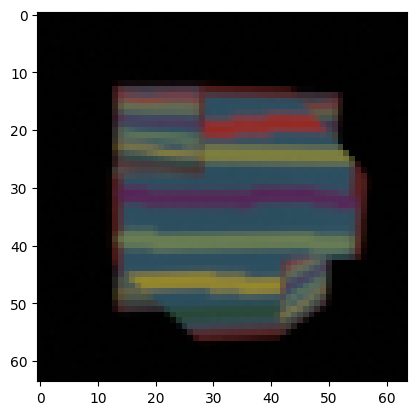

In [9]:
plt.imshow(super_albedos[50].astype('float32'))

In [11]:
totalLen = len(super_photos)
lightjumps = 57
print(len(super_photos))
print(len(super_labels))
print(len(super_vectors))
print(super_degrees.shape)
print(super_albedos.shape)
print(super_normals.shape)
print(super_masks.shape)

17100
17100
17100
(300,)
(300, 64, 64, 3)
(300, 64, 64, 3)
(300, 64, 64, 3)


In [12]:
super_degrees_long = np.zeros((totalLen,)).astype('S')
super_albedos_long = np.zeros((totalLen, 64, 64, 3))
super_normals_long = np.zeros((totalLen, 64, 64, 3))
super_masks_long = np.zeros((totalLen, 64, 64, 3))

In [13]:
for i in range(totalLen):
    super_degrees_long[i] = super_degrees[i // lightjumps]
    super_albedos_long[i] = super_albedos[i // lightjumps]
    super_normals_long[i] = super_normals[i // lightjumps]
    super_masks_long[i] = super_masks[i // lightjumps]

In [14]:
del super_degrees; del super_albedos; del super_normals; del super_masks;

(17100, 64, 64, 3)


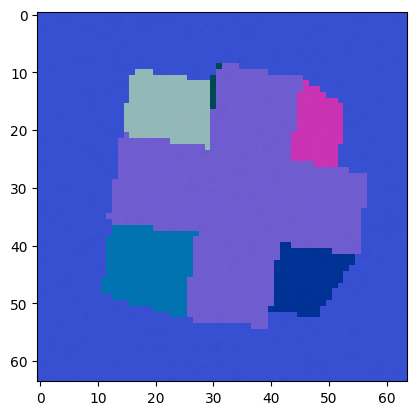

In [15]:
print(super_normals_long.shape)
plt.imshow(super_normals_long[250].astype('float32'))

In [16]:
indices = np.arange(totalLen)
print(indices)

[    0     1     2 ... 17097 17098 17099]


In [17]:
np.random.shuffle(indices)
print(indices)

[ 2632 15334  8945 ... 16764  7513 16374]


In [18]:
test_ratio = 0.4
train_idx = (int)(totalLen * (1 - test_ratio))
test_idx = totalLen - train_idx
print(train_idx, test_idx)

10260 6840


In [19]:
indices_test = indices[train_idx:totalLen]
indices = indices[0:train_idx]

In [20]:
save_folder_name = "BigData"
test_save_name = "TestBigPastel"
train_save_name= "TrainBigPastel"

In [21]:
test_photos = super_photos[indices_test]
train_photos = super_photos[indices]
np.save(save_folder_name + "\\" + test_save_name + "Photos.npy", test_photos)
np.save(save_folder_name + "\\" + train_save_name + "Photos.npy", train_photos)
del super_photos; del test_photos; del train_photos;

In [22]:
test_labels = super_labels[indices_test]
train_labels = super_labels[indices]
np.save(save_folder_name + "\\" + test_save_name + "Labels.npy", test_labels)
np.save(save_folder_name + "\\" + train_save_name + "Labels.npy", train_labels)
del super_labels; del test_labels; del train_labels;

In [23]:
test_vectors = super_vectors[indices_test]
train_vectors = super_vectors[indices]
np.save(save_folder_name + "\\" + test_save_name + "Vectors.npy", test_vectors)
np.save(save_folder_name + "\\" + train_save_name + "Vectors.npy", train_vectors)
del super_vectors; del test_vectors; del train_vectors;

In [24]:
test_degrees = super_degrees_long[indices_test]
train_degrees = super_degrees_long[indices]
np.save(save_folder_name + "\\" + test_save_name + "Degrees.npy", test_degrees)
np.save(save_folder_name + "\\" + train_save_name + "Degrees.npy", train_degrees)
del super_degrees_long; del test_degrees; del train_degrees;

In [25]:
test_albedos = super_albedos_long[indices_test]
train_albedos = super_albedos_long[indices]
np.save(save_folder_name + "\\" + test_save_name + "Albedos.npy", test_albedos)
np.save(save_folder_name + "\\" + train_save_name + "Albedos.npy", train_albedos)
del super_albedos_long; del test_albedos; del train_albedos;

In [26]:
test_normals = super_normals_long[indices_test]
train_normals = super_normals_long[indices]
np.save(save_folder_name + "\\" + test_save_name + "Normals.npy", test_normals)
np.save(save_folder_name + "\\" + train_save_name + "Normals.npy", train_normals)
del super_normals_long; del test_normals; del train_normals;

In [27]:
test_masks = super_masks_long[indices_test]
train_masks = super_masks_long[indices]
np.save(save_folder_name + "\\" + test_save_name + "Masks.npy", test_masks)
np.save(save_folder_name + "\\" + train_save_name + "Masks.npy", train_masks)
del super_masks_long; del test_masks; del train_masks;